In [1]:
#%% Import Moduels

## System Tools
import os
import sys
import numpy as np
from collections import OrderedDict
import itertools
## I/O Tools
import pickle as pickle
## Data Process Tools
import pandas as pd
# import modin.pandas as pd
import datetime
## Graphs
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as figpdf
# import Graphics as MyGR
## Statistical Tools
from scipy.stats import t as TDist
import statsmodels.formula.api as sm
from statsmodels.tsa.api import VAR
from scipy.stats import mstats
import statsmodels.api as SMAPI
from statsmodels.tsa.tsatools import detrend as DeTrend
from statsmodels.tsa.filters.hp_filter import hpfilter as HPfilter
from statsmodels.tsa.filters.bk_filter import bkfilter as BKfilter
## Database API
# from fredapi import Fred
# fred = Fred(api_key='86cde3dec5dda5ffca44b58f01838b1e')
## Numerical API
from scipy.interpolate import interp1d
## Regular Expression API
import re
# import ray

idx = pd.IndexSlice
# End of Section: Import Moduels
###############################################################################

#%% Setup Working Directory
## Windows System Path
FolderList = [xx+"\\Dropbox\\Research Projects\\02_EquityMarkets_MonetaryPolicy\\Data\\Micro_data\\codes\\" \
              for xx in ["D:\\", "E:\\","B:\\","/mnt/b/"]]
for Folder in FolderList:
    if os.path.exists(Folder):
        os.chdir(Folder)     

## Output Folder
OutputFolder = 'TableGraph/SumStat/'
if not os.path.exists(OutputFolder):
    os.makedirs(OutputFolder)
# End of Section: Setup Working Directory
###############################################################################


In [2]:
sys.path.append("../../../../../Code/PythonLib/")

import Toolkit_TimeSeries as MyTS
import Toolkit_Graphics as MyGR

In [3]:
# plt.rcParams.update({'font.family':'sans-serif'})
# plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [4]:
import stata_setup
stata_setup.config("D:/Stata17/","mp")
from pystata import stata
stata.run('set processors 8')


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 8-core , expiring  1 Jan 2025
Serial number: 501709301094
  Licensed to: Xing Guo
               Bank of Canada

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.

Running c:\ado\plus\profile.do ...
command window is unrecognized
r(199);
    The maximum number of processors or cores being used 

# Load in the data set

In [5]:
DS_Exit = pd.read_excel('../datasets/BDS/FirmExit.xlsx').set_index('Year')

In [6]:
DS_ByAge = pd.read_csv('../datasets/BDS/BDS2021_ByAge.csv').set_index(['year', 'fage'])

# Exit rate

<Axes: xlabel='Year'>

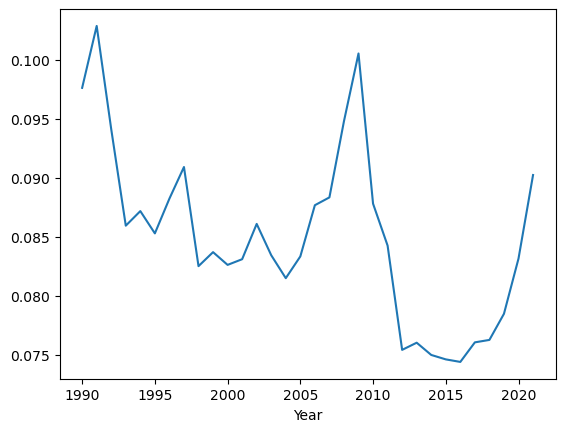

In [7]:
DS_Exit.loc[1990:2021, 'Firm_ExitRate'].plot()

In [8]:
DS_Exit.loc[1990:2021, 'Firm_ExitRate'].mean()

0.08504728553882471

# Life-cycle profile 

In [9]:
for vv in DS_ByAge.columns:
    DS_ByAge.loc[DS_ByAge[vv]=='X', vv] = np.nan 


In [10]:
for vv in DS_ByAge.columns:
    DS_ByAge.loc[:, vv] = pd.to_numeric(DS_ByAge.loc[:, vv])


In [14]:
DS_ByAge

firms     estabs         emp       denom  \
year fage                                                            
1978 a) 0              486456.0   493546.0   2545510.0   1272772.0   
     b) 1              355229.0   365696.0   2345414.0   2327670.0   
     c) 2                   NaN        NaN         NaN         NaN   
     d) 3                   NaN        NaN         NaN         NaN   
     e) 4                   NaN        NaN         NaN         NaN   
...                         ...        ...         ...         ...   
2021 h) 11 to 15       632891.0   704549.0   8601935.0   8937309.0   
     i) 16 to 20       495082.0   578719.0   8401544.0   8682141.0   
     j) 21 to 25       373589.0   477686.0   7949876.0   8298188.0   
     k) 26+            806180.0  1268303.0  28635426.0  29708139.0   
     l) Left Censored  322336.0  1338579.0  50350367.0  51728480.0   

                      estabs_entry estabs_entry_rate estabs_exit  \
year fage                                                          
1978 a) 0                 493546.0           199.998         NaN   
     b) 1                   4560.0             1.072    123700.0   
     c) 2                      NaN               NaN         NaN   
     d) 3                      NaN               NaN         NaN   
     e) 4                      NaN               NaN         NaN   
...                            ...               ...         ...   
2021 h) 11 to 15           28845.0             3.976     70657.0   
     i) 16 to 20           22139.0             3.726     53033.0   
     j) 21 to 25           17959.0             3.661     43625.0   
     k) 26+                42142.0             3.247    101636.0   
     l) Left Censored      57916.0             4.264     97555.0   

                      estabs_exit_rate job_creation job_creation_births  ...  \
year fage                                                                ...   
1978 a) 0                          NaN    2545512.0           2545510.0  ...   
     b) 1                       29.088     807923.0             49332.0  ...   
     c) 2                          NaN          NaN                 NaN  ...   
     d) 3                          NaN          NaN                 NaN  ...   
     e) 4                          NaN          NaN                 NaN  ...   
...                                ...          ...                 ...  ...   
2021 h) 11 to 15                  9.74    1011528.0            200690.0  ...   
     i) 16 to 20                 8.926     895586.0            190370.0  ...   
     j) 21 to 25                 8.894     760312.0            171237.0  ...   
     k) 26+                       7.83    2345839.0            643960.0  ...   
     l) Left Censored            7.182    4006381.0           1026912.0  ...   

                      job_destruction_deaths job_destruction_continuers  \
year fage                                                                 
1978 a) 0                                NaN                        NaN   
     b) 1                           510065.0                   250310.0   
     c) 2                                NaN                        NaN   
     d) 3                                NaN                        NaN   
     e) 4                                NaN                        NaN   
...                                      ...                        ...   
2021 h) 11 to 15                    435657.0                  1244479.0   
     i) 16 to 20                    370001.0                  1086342.0   
     j) 21 to 25                    345726.0                  1109564.0   
     k) 26+                         995019.0                  3497261.0   
     l) Left Censored              1334784.0                  5413339.0   

                      job_destruction_rate_deaths job_destruction_rate  \
year fage                                                                
1978 a) 0                                     NaN                

In [16]:
Temp = DS_ByAge[['estabs', 'emp']]

In [18]:
Temp['emp_per_est'] = Temp['emp']/Temp['estabs']

C:\Users\guoxi\AppData\Local\Temp\ipykernel_28472\4200968979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp['emp_per_est'] = Temp['emp']/Temp['estabs']


In [20]:
Temp['emp_per_est'].unstack()

fage,a) 0,b) 1,c) 2,d) 3,e) 4,f) 5,g) 6 to 10,h) 11 to 15,i) 16 to 20,j) 21 to 25,k) 26+,l) Left Censored
year,,,,,,,,,,,,
1978,5.157594,6.413562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.826947
1979,5.067629,6.59726,7.241986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.324656
1980,5.026169,6.262345,6.973532,7.687908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.95226
1981,5.532313,6.443262,6.930537,7.499192,8.264415,NaN,NaN,NaN,NaN,NaN,NaN,21.469216
1982,5.34187,6.96418,6.93946,7.321649,7.911915,8.597868,NaN,NaN,NaN,NaN,NaN,21.78508
1983,5.615863,6.496221,7.428953,7.304653,7.570084,8.194403,8.694355,NaN,NaN,NaN,NaN,21.794241
1984,5.465973,7.462281,7.586929,8.54099,8.279382,8.415832,9.271167,NaN,NaN,NaN,NaN,23.093089
1985,5.742975,7.325511,8.588986,8.324386,9.246625,8.942151,9.654958,NaN,NaN,NaN,NaN,24.286213
1986,5.723806,7.38393,8.140327,8.969345,8.937139,9.773098,9.91357,NaN,NaN,NaN,NaN,25.022435


In [28]:
Temp['emp'].unstack().div(Temp['emp'].unstack().sum(axis=1), axis=0).loc[2003:].mean()

fage
a) 0                0.020244
b) 1                0.020225
c) 2                 0.01946
d) 3                0.018808
e) 4                0.018247
f) 5                0.017837
g) 6 to 10          0.084905
h) 11 to 15         0.077741
i) 16 to 20         0.075346
j) 21 to 25         0.070862
k) 26+              0.126396
l) Left Censored     0.44993
dtype: object

In [21]:
DS_ByAge.columns

Index(['firms', 'estabs', 'emp', 'denom', 'estabs_entry', 'estabs_entry_rate',
       'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp'],
      dtype='object')

<Axes: xlabel='year'>

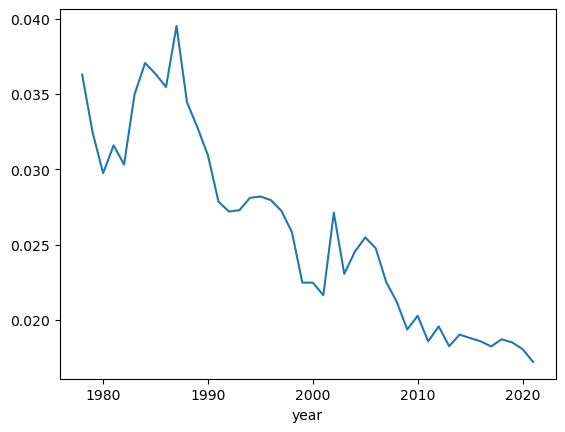

In [24]:
(DS_ByAge['net_job_creation'].unstack()['a) 0']/DS_ByAge.groupby('year')['emp'].sum()).plot()